In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
path = 'wildchat_english_clustered_50_no_conversation' ## this is a dataframe include the raw data as well as embedding and cluster information see sample below 
raw_df = pd.read_pickle(path)

In [3]:
raw_df.head()

,conversation_hash,hashed_ip,timestamp,conversation,first_user_query,device_type,cluster,typid_label,typid_score,politeguard_label,politeguard_score,formality_label,formality_score,message_count,is_ip_message_gt_20,is_ip_message_gt_100,embedding,_tok_len
0,c9ec5b440fbdd2a269333dd241f32f64,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:02:53+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.932727,polite,0.986204,formal,0.998626,29,True,False,"[-0.0406569205224514, -0.045902613550424576, 0...",232
1,cf1267ca6b2f6fccc9c36652a00059a1,8133108d1c433c180c6be8302dc5a6681f2bec980190a1...,2023-04-09 00:04:52+00:00,"[{'content': 'Old age PT hx of DM, HTN, dyslip...","Old age PT hx of DM, HTN, dyslipidemia His ECG...",windows,41,polite,0.888530,neutral,0.623107,informal,0.900437,1,False,False,"[0.06428948044776917, 0.03388073667883873, -0....",22
2,e98d3e74c57f9a65261df393d9124ac2,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:06:49+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.936191,polite,0.987203,formal,0.998625,29,True,False,"[-0.020614705979824066, -0.03560478612780571, ...",240
3,2e8fd255aab694b07a0be8d83cb53a7b,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:08:41+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,49,polite,0.929415,polite,0.987390,formal,0.998623,29,True,False,"[-0.029296936467289925, -0.047738101333379745,...",263
4,59c72510f3143025f94f75b883b026bd,dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...,2023-04-09 00:10:00+00:00,[{'content': 'i wanna you to write me terms & ...,i wanna you to write me terms & conditions and...,windows,2,polite,0.922587,polite,0.955610,informal,0.997220,1,False,False,"[-0.006691548973321915, 0.055655788630247116, ...",14


In [4]:
raw_df.columns

Index(['conversation_hash', 'hashed_ip', 'timestamp', 'conversation',
       'first_user_query', 'device_type', 'cluster', 'typid_label',
       'typid_score', 'politeguard_label', 'politeguard_score',
       'formality_label', 'formality_score', 'message_count',
       'is_ip_message_gt_20', 'is_ip_message_gt_100', 'embedding', '_tok_len'],
      dtype='object')

In [5]:
cluster_info_df = pd.read_csv("cluster_summary_results.csv")
cluster_info_df.head()

,cluster,total_messages,unique_ips,avg_ip_message_count,median_ip_message_count,std_ip_message_count,perc_msg_above_20,perc_msg_above_100,coherence,cluster_typid_impolite,cluster_politeguard_impolite,cluster_formality_informal,device_mac_percent,device_mobile_percent,device_other_percent,device_unknown_percent,device_windows_percent
0,0,8610,5022,83.765621,9.0,337.469410,37.549361,15.400697,0.097492,24.355401,6.144019,50.940767,11.835075,12.659698,12.125436,0.998839,62.380952
1,1,3229,480,752.517498,116.0,989.655170,76.277485,51.440074,0.313439,55.744813,4.118922,2.663363,34.871477,4.893156,1.052958,0.030969,59.151440
2,2,7632,3929,171.955451,14.0,504.345714,44.025157,24.764151,0.155384,40.749476,9.512579,29.703878,8.844340,17.937631,6.001048,0.170335,67.046646
3,3,18938,7142,39.065794,11.0,114.945673,34.729116,6.215017,0.871547,0.021122,0.000000,0.005280,18.671454,10.967367,0.227057,0.000000,70.134122
4,4,9694,8096,25.704044,2.0,172.513480,14.854549,4.559521,0.718415,75.293996,1.794925,70.311533,10.552919,19.125232,6.529812,0.453889,63.338147


In [6]:
cluster_info_df.columns

Index(['cluster', 'total_messages', 'unique_ips', 'avg_ip_message_count',
       'median_ip_message_count', 'std_ip_message_count', 'perc_msg_above_20',
       'perc_msg_above_100', 'coherence', 'cluster_typid_impolite',
       'cluster_politeguard_impolite', 'cluster_formality_informal',
       'device_mac_percent', 'device_mobile_percent', 'device_other_percent',
       'device_unknown_percent', 'device_windows_percent'],
      dtype='object')

In [7]:
# --- Canonical grouping derived from Tables 2-4 & peripheral analysis ---
cluster_groups = {
    # 1. PERFORMATIVE  –  strongly instrumental, outcome-driven
    "perf_technical":  [0, 11, 23, 30, 34, 40, 52],        # hard-coding / STEM Q&A 
    "perf_other":   [2, 26, 27, 33, 35, 41, 53],    
    "perf_etsy": [15],
    
    # 2. EXPRESSIVE  –  creative / affective engagements
    "expr_narrative_mill": [7, 12, 22, 36, 38, 39, 48, 50, 54, 59], # high-IP/ 
    "expr_other": [1, 6, 8, 10, 14, 19, 24, 25, 32], # low IP
    
    # 3. MIXED  –  pragmatic + imaginative in one breath
    #"mixed_workplay":  [5, 13, 21, 28, 29, 31, 37, 44, 45, 46, 47, 51, 55, 58],
    "mixed_business":[5,21,31,33,44,45,51],
    "mixed_miscellaneous": [46,47,28,29,55,58],
    "mixed_languages": [13, 37],
    
    
    # 4. PERIPHERAL / FORMALISED  –  ritualised or automated traffic
    "peripheral":   [3, 4, 9, 17, 18, 42, 43, 56, 57]    # image-prompt macros, greetings, meta-hacks  
}

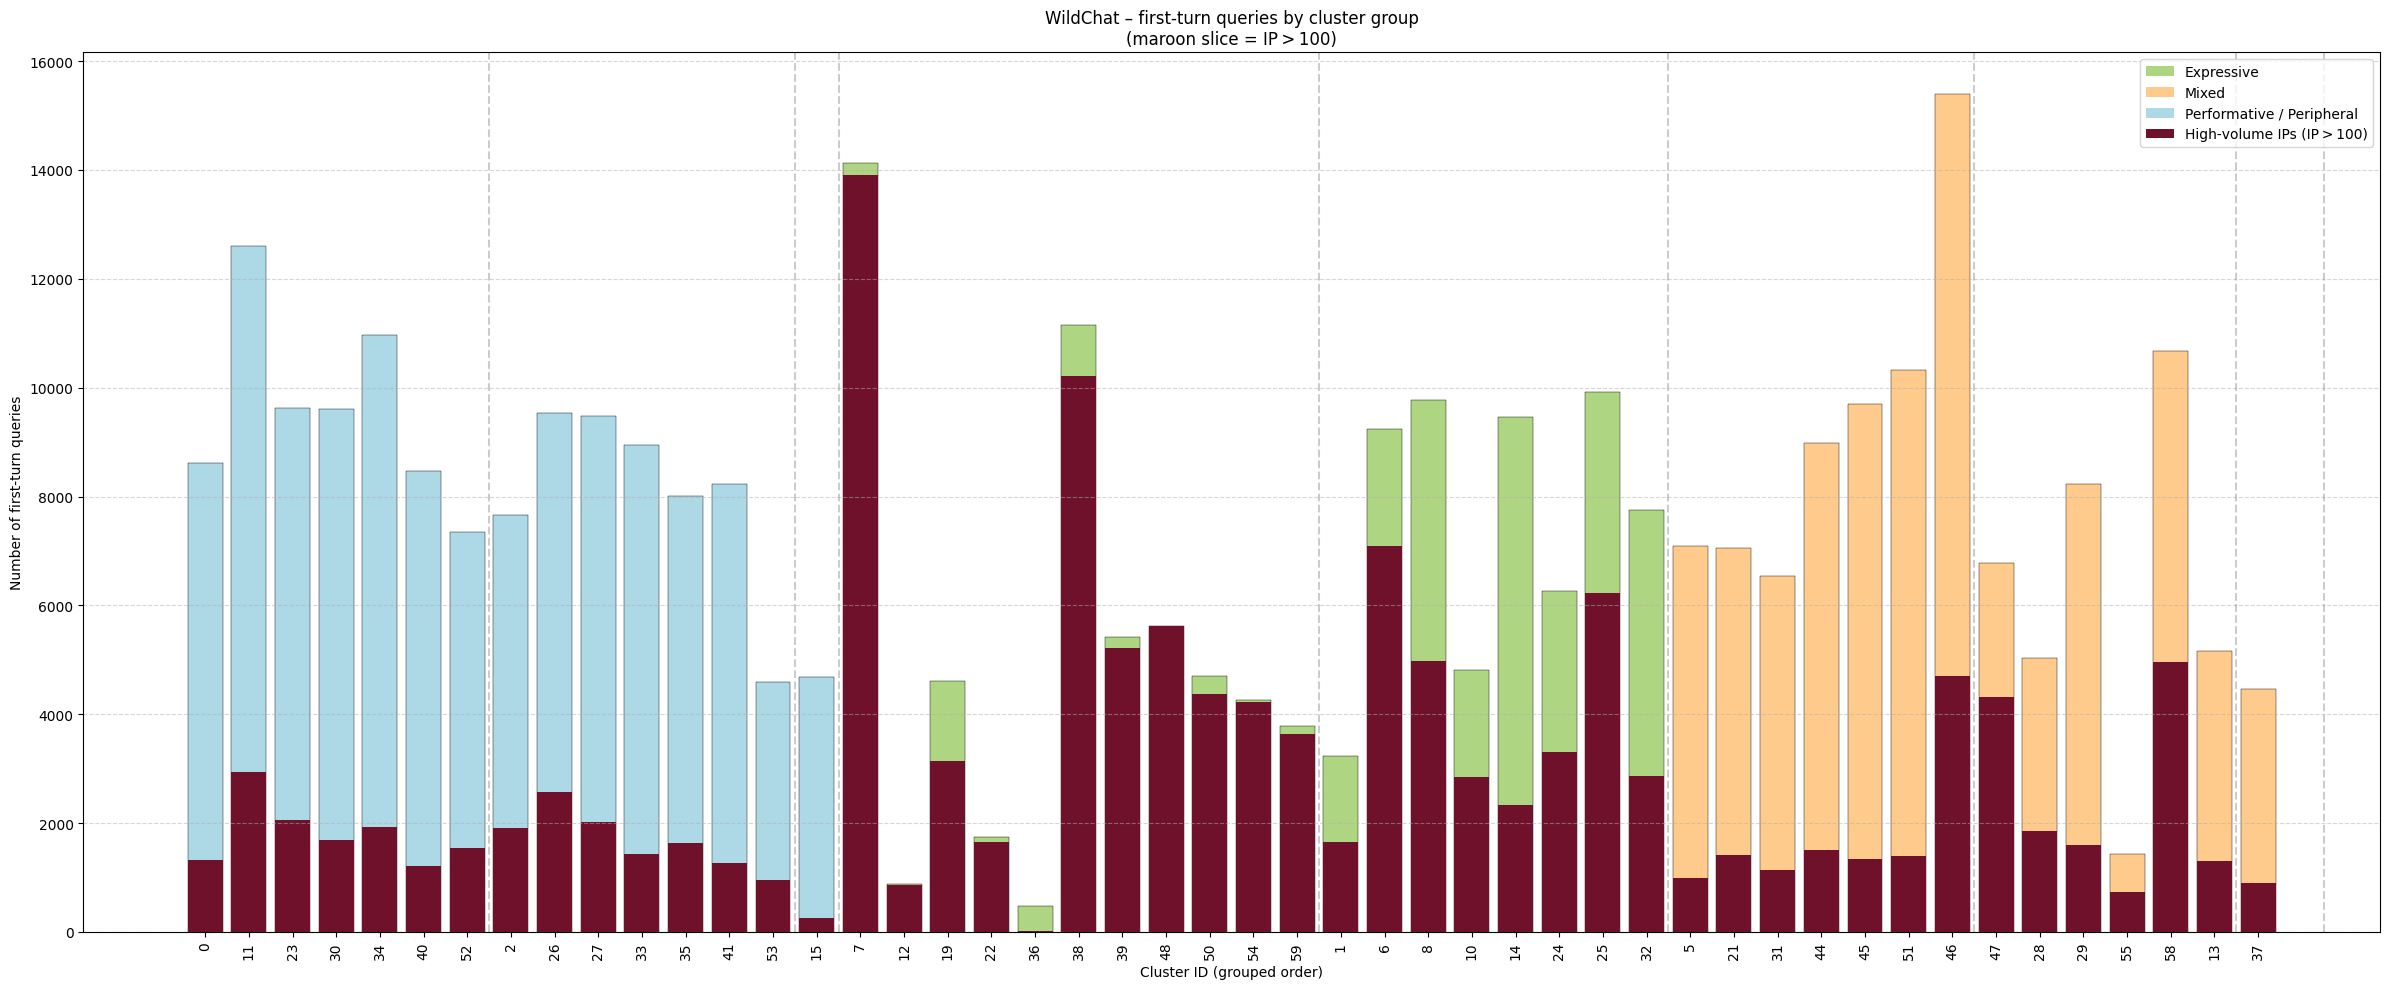

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ------------------------------------------------------------------
# 0. Make sure raw_df & cluster_info_df are available
assert "raw_df" in globals(),  "Load raw_df first!"
assert "cluster_info_df" in globals(), "Load cluster_info_df first!"

# ------------------------------------------------------------------
# 1. Canonical cluster grouping  (define it BEFORE plotting)
cluster_groups = {
    # PERFORMATIVE
    "perf_technical":  [0, 11, 23, 30, 34, 40, 52],
    "perf_other":      [2, 26, 27, 33, 35, 41, 53],
    ""
    "perf_etsy":       [15],

    # EXPRESSIVE
    "expr_narrative_mill": [7, 12, 19, 22, 36, 38, 39, 48, 50, 54, 59],
    "expr_other":          [1, 6, 8, 10, 14, 24, 25, 32],

    # MIXED
    "mixed_business":      [5, 21, 31, 33, 44, 45, 51],
    "mixed_miscellaneous": [46, 47, 28, 29, 55, 58],
    "mixed_languages":     [13, 37],

    # # PERIPHERAL
    # "peripheral":          [3, 4, 9, 17, 18, 42, 43, 56, 57],
}

# ------------------------------------------------------------------
# 2. Build mapping & ordering
type_palette = {
    "Performative": "#add8e6",   # light‑blue
    "Expressive":     "#aed581",   # light‑green
    "Mixed":        "#ffcb8c",   # light‑orange
}
high_ip_color = "#6f112b"       # maroon

cluster_type, ordered_clusters = {}, []
for key, cid_list in cluster_groups.items():
    macro = ("Expressive"      if key.startswith("expr_") else
             "Mixed"         if key.startswith("mixed_") else
             "Performative")   # includes 'peripheral'

    for cid in cid_list:
        if cid not in cluster_type:               # first assignment wins
            cluster_type[cid] = macro
            ordered_clusters.append(cid)

# ------------------------------------------------------------------
# 3. Counts
cluster_counts = raw_df["cluster"].value_counts()
high_ip_counts = raw_df[raw_df["is_ip_message_gt_100"]]["cluster"].value_counts()

counts_regular = [cluster_counts.get(c, 0)   for c in ordered_clusters]
counts_highip  = [high_ip_counts.get(c, 0)   for c in ordered_clusters]
base_colors    = [type_palette[cluster_type[c]] for c in ordered_clusters]

# ------------------------------------------------------------------
# 4. Plot
fig, ax = plt.subplots(figsize=(24, 10))
x = range(len(ordered_clusters))
ax.bar(x, counts_regular, width=0.8, color=base_colors,
       edgecolor="black", linewidth=0.3)
ax.bar(x, counts_highip,  width=0.8, color=high_ip_color)

ax.set_xticks(x)
ax.set_xticklabels(ordered_clusters, rotation=90)
ax.set_xlabel("Cluster ID (grouped order)")
ax.set_ylabel("Number of first‑turn queries")
ax.set_title("WildChat – first‑turn queries by cluster group\n(maroon slice = IP > 100)")

# visual separators between groups
boundary = 0
for cid_list in cluster_groups.values():
    boundary += len(cid_list)
    ax.axvline(boundary - 0.5, color="grey", linestyle="--", alpha=0.4)

legend_handles = [
    Patch(facecolor=type_palette["Expressive"],     label="Expressive"),
    Patch(facecolor=type_palette["Mixed"],        label="Mixed"),
    Patch(facecolor=type_palette["Performative"], label="Performative / Peripheral"),
    Patch(facecolor=high_ip_color,                label="High‑volume IPs (IP > 100)"),
]
ax.legend(handles=legend_handles, loc="upper right")
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# colour palette
type_palette = {
    "Performative": "#add8e6",   # light blue
    "Expressive":     "#aed581",   # light green
    "Mixed":        "#ffcb8c",   # light orange
}
high_ip_color = "#6f112b"       # maroon

# A nicer display name for each segment --------------------------------
segment_display = {
    "perf_technical":      "perf\ntechnical",
    "perf_other":          "perf\nother",
    "perf_etsy":           "perf\netsy",
    "expr_narrative_mill": "expr\n'narrative-mill'",
    "mixed_business":      "mixed\nbusiness",
    "mixed_miscellaneous": "mixed\nmisc",
    "mixed_languages":     "mixed\nlanguages",
}

# helper: map group-key to macro-type
def macro_of(key: str) -> str:
    if key.startswith("perf_"):
        return "Performative"
    elif key.startswith("expr_"):
        return "Expressive"
    elif key.startswith("mixed_"):
        return "Mixed"
    else:
        return "Performative"

# counts
cluster_counts   = raw_df["cluster"].value_counts()
high_ip_counts   = raw_df[raw_df["is_ip_message_gt_100"]]["cluster"].value_counts()
coherence_map    = cluster_info_df.set_index("cluster")["coherence"].to_dict()

# build ordered lists: iterate groups, sort clusters inside by bar height desc
ordered_clusters, macro_colors = [], []
for key, ids in cluster_groups.items():
    ids_sorted = sorted(ids, key=lambda cid: cluster_counts.get(cid, 0), reverse=True)
    ordered_clusters.extend(ids_sorted)
    macro_colors.extend([type_palette[macro_of(key)]] * len(ids_sorted))

# pre-compute bar components
regular_counts = [cluster_counts.get(c, 0) for c in ordered_clusters]
high_counts    = [high_ip_counts.get(c, 0) for c in ordered_clusters]
coherence_vals = [coherence_map.get(c, None) for c in ordered_clusters]

plt.rcParams.update(
    {"figure.dpi":        300,        # 300 dpi for print
     "savefig.dpi":       300,
     "font.family": "DejaVu Sans",
     "font.size": 22,
     "axes.titlesize": 28,
     "axes.labelsize": 14,
     "legend.fontsize": 18})

# plotting
fig, ax1 = plt.subplots(figsize=(23.4, 16.6))# 15.2; 10.8
x = range(len(ordered_clusters))
#===
title_main   = "WildChat – first-turn queries by cluster segment"
#title_sub    = "Coherence overlaid (right axis)"

# put main title on the figure canvas, not the axes, so it never collides
fig.suptitle(title_main,
             fontsize=30, fontweight="bold", y=0.97)   # y controls vertical offset

# # add the subtitle slightly lower and smaller
# fig.text(0.5, 0.935, title_sub,
#          ha='center', va='top', fontsize=22)

# leave some head-room for the titles before we tighten the layout
fig.subplots_adjust(top=0.86)
##

# base bars
ax1.bar(x, regular_counts, width=0.65, color=macro_colors,
        edgecolor="black", linewidth=0.3, zorder=2, label="Regular traffic")
ax1.bar(x, high_counts,    width=0.65, color=high_ip_color,
        zorder=3, label="High‑volume IPs (IP > 100)")

ax1.set_ylabel("Number of first‑turn queries", fontsize=22, labelpad=10)
ax1.set_xlabel("Cluster ID (grouped & sorted by volume within segment)",  fontsize=22, labelpad=10)
# ax1.set_title("WildChat – first‑turn queries by cluster segment\nCoherence overlaid (right axis)")
ax1.set_xticklabels(ordered_clusters, rotation=45, ha='right')

# ------------- coherence overlay -------------
ax2 = ax1.twinx()
# ax2.plot(x, coherence_vals, "o:", linewidth=2, color="black", markersize=5,
#          label="Embedding coherence", zorder=4)
ax2.scatter(x, coherence_vals,
            s=70, facecolors='white', edgecolors='black',
            linewidths=1.2, zorder=4)


ax2.set_ylabel("Coherence (0–1)", fontsize=22, labelpad=10)
ax2.set_ylim(0, 1)

ax1.tick_params(axis='x', labelsize=14)   # small numbers
ax1.tick_params(axis='y', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)

# group separators
boundary_idx = 0
for ids in cluster_groups.values():
    boundary_idx += len(ids)
    ax1.axvline(boundary_idx - 0.5, linestyle="--", color="grey", alpha=0.4, zorder=1)

# x‑tick labels
ax1.set_xticks(x)
ax1.set_xticklabels(ordered_clusters, rotation=45)

# legends
handles = [
    Patch(facecolor=type_palette["Expressive"], label="Expressive"),
    Patch(facecolor=type_palette["Mixed"],    label="Mixed"),
    Patch(facecolor=type_palette["Performative"], label="Performative"),
    Patch(facecolor=high_ip_color,            label="High‑volume IPs (IP > 100)"),
]
h1, _ = ax1.get_legend_handles_labels()
h2, _ = ax2.get_legend_handles_labels()
ax2.legend(handles + h2, [h.get_label() for h in handles] + ["Coherence"], loc="upper left")

# threshold = np.quantile([v for v in coherence_vals if v is not None], .9)
# abnormal   = [(i, v) for i, v in enumerate(coherence_vals) if v and v >= threshold]
# ax2.scatter(*zip(*abnormal), s=120, facecolors='none', edgecolors='#ff4500', linewidths=2)

# top-decile highlight
threshold = np.quantile([v for v in coherence_vals if v is not None], .9)
for i, v in enumerate(coherence_vals):
    if v and v >= threshold:
        ax2.scatter(i, v, s=200, facecolors='none',
                    edgecolors="#d62728", linewidths=2, zorder=5)

barwidth = 0.65

ax1.bar(x, regular_counts, width=barwidth, color=macro_colors,
        edgecolor="black", linewidth=0.25, zorder=2)
ax1.bar(x, high_counts,   width=barwidth, color=high_ip_color, alpha=.85, zorder=3,
        edgecolor="white", linewidth=0.25)

# coherence no-line scatter
ax2.scatter(x, coherence_vals, s=60,
            facecolors="white", edgecolors="black", linewidths=1.2, zorder=4)

# highlight top-10% coherence
for i, v in enumerate(coherence_vals):
    if v and v >= threshold:
        ax2.scatter(i, v, s=120, facecolors='none',
                    edgecolors="#d62728", linewidths=2, zorder=5)



# # use the “nice” display names instead of key.replace("_", "\n")
# offset = 0
# total  = len(ordered_clusters)
# for key, ids in cluster_groups.items():
#     n = len(ids)
#     center_frac = (offset + (n - 1) / 2) / total
#     ax1.text(center_frac, 1.02,
#              segment_display.get(key, key),
#              transform=ax1.transAxes,
#              ha='center', va='bottom',
#              fontsize=13, fontweight='bold')
#     offset += n

# ---------------------------------------------------------------
# # ❶  map every cluster-ID to its x-coordinate
# id2x = {cid: i for i, cid in enumerate(ordered_clusters)}
# n_tot = len(ordered_clusters)

# # ❷  ↩ NEW: build label text and span directly from cluster_groups
# #     (so you never need to hard-code ID lists again)
# label_boxes = [
#     (segment_display.get(seg_key, seg_key), seg_ids)
#     for seg_key, seg_ids in cluster_groups.items()
# ]

# #  (everything else stays as you have it)
# fig.subplots_adjust(top=0.78)      # 22 % of the canvas for title + boxes

# # ❸  annotate
# y_text = 1.06                      # raise boxes a bit
# txt_kw = dict(
#     transform=ax1.transAxes,
#     ha="center", va="bottom",
#     fontsize=18, fontweight='bold',          # bigger font
#     bbox=dict(
#         facecolor='white', edgecolor='black',
#         alpha=0.95, linewidth=1.2,
#         boxstyle='round,pad=0.45'            # more padding
#     )
# )
# for label, ids in label_boxes:
#     xs = [id2x[c] for c in ids if c in id2x]
#     if not xs:
#         continue
#     centre = (min(xs) + max(xs)) / 2 / n_tot
#     ax1.text(centre, y_text, label.replace(" & ", "\n& "), **txt_kw)

# # ❹  give bars a bit more head-room so bigger boxes never collide
# ax1.set_ylim(0, max(regular_counts) * 1.18)

# # ❺  tighten AFTER adding the annotations
# fig.subplots_adjust(top=0.83)  # leave 17 % for title + boxes
# plt.tight_layout()

# # # guarantee the bars don’t poke into the subtitle region
# # ymax = max(regular_counts) * 1.08          # slightly taller than before
# # ax1.set_ylim(0, ymax)

# final cosmetic touches
ax1.set_xlabel("Cluster ID (grouped & sorted by volume within segment)", labelpad=12)
ax1.set_ylabel("Number of first-turn queries", labelpad=12)
ax2.set_ylabel("Coherence (0–1)", labelpad=12)


fig.set_dpi(300)


ax1.grid(axis="y", linestyle="--", alpha=0.5, zorder=0)
plt.tight_layout()